<a href="https://colab.research.google.com/github/TheAssis/AprendendoMachineLearning/blob/master/SOMcolors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# SOM
# from https://www.superdatascience.com/deep-learning/ 


# Importing the libraries
import numpy as np

import pandas as pd

In [0]:
# Install MiniSOM
# https://github.com/JustGlowing/minisom 
!pip install minisom

  Running setup.py bdist_wheel for minisom ... - done
  Stored in directory: /root/.cache/pip/wheels/4a/5c/75/d21b1b07292ccd8720a8076304f793031e016c16e9c8eacbf9
Successfully built minisom


In [0]:
# Getting the data

import os
import tarfile
from six.moves import urllib
import csv

FILE_TO_DOWNLOAD =  "objetosECores.csv"
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rodolfostark/ColorSensorMachineLearning/"
DATA_PATH = "master/"
DATA_URL = DOWNLOAD_ROOT + DATA_PATH + FILE_TO_DOWNLOAD

def fetch_data(data_url=DATA_URL, data_path=DATA_PATH, file_to_download=FILE_TO_DOWNLOAD):
  if not os.path.isdir(data_path):
    os.makedirs(data_path)
  urllib.request.urlretrieve(data_url, data_path+file_to_download)
  
fetch_data()

# observando se o diretório datasets foi criado com sucesso 
# !ls dados


!ls master/

objetosECores.csv


In [0]:
#processo de leitura do arquivo de DADOS

leitura = csv.reader(open('master/objetosECores.csv','r'))
leitura = list(leitura) # tem que converter pra lista primeiro
leitura = np.array(leitura)# e depois converte pra array
#leitura2 = leitura.astype(int)
# sequencias de testes pra checar se o array foi gerado de forma correta
#print (leitura)
print("\n")
#print(leitura[0])
print("\n")
#print(leitura[0][0])

objetos_coloridos = leitura [1:,0:3] # objeto vermelho é o array apenas numérico
objetos_coloridos = objetos_coloridos.astype(float)
print(objetos_coloridos)
y = leitura [1:,3] # objeto vermelho é o array apenas numérico
y = y.astype(int)
print(y)






[[ 76. 272.  48.]
 [ 68. 272.  48.]
 [ 76. 264.  48.]
 [ 75. 258.  48.]
 [ 76. 273.  48.]
 [ 76. 273.  48.]
 [ 76. 273.  48.]
 [ 76. 274.  48.]
 [ 76. 266.  48.]
 [ 72. 281.  43.]
 [ 78. 276.  49.]
 [ 78. 267.  49.]
 [ 78. 274.  49.]
 [ 78. 281.  49.]
 [ 78. 282.  49.]
 [ 78. 282.  50.]
 [ 78. 276.  50.]
 [ 78. 282.  49.]
 [126.  67.  23.]
 [127.  60.  23.]
 [121.  68.  22.]
 [127.  68.  23.]
 [127.  64.  23.]
 [119.  68.  22.]
 [127.  68.  22.]
 [121.  67.  22.]
 [126.  67.  22.]
 [122.  67.  22.]
 [122.  59.  22.]
 [122.  67.  22.]
 [116.  67.  22.]
 [114.  67.  22.]
 [122.  67.  22.]
 [122.  67.  22.]
 [122.  67.  22.]
 [122.  67.  22.]
 [157. 154.  39.]
 [157. 154.  39.]
 [151. 154.  39.]
 [158. 148.  39.]
 [158. 154.  39.]
 [158. 155.  39.]
 [151. 148.  39.]
 [158. 154.  39.]
 [157. 155.  39.]
 [158. 155.  40.]
 [152. 155.  39.]
 [159. 149.  39.]
 [158. 156.  39.]
 [159. 156.  39.]
 [159. 156.  39.]
 [159. 156.  39.]
 [158. 156.  39.]
 [153. 156.  39.]]
[-1 -1 -1 -1 -1 -1 -1 -

In [0]:
X = objetos_coloridos

# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 25, y = 25, input_len = 3, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

[[3, 24, 'r'], [9, 24, 'r'], [3, 14, 'r'], [4, 14, 'r'], [5, 20, 'r'], [5, 20, 'r'], [5, 20, 'r'], [6, 24, 'r'], [0, 16, 'r'], [11, 24, 'r'], [1, 24, 'r'], [0, 13, 'r'], [0, 20, 'r'], [8, 23, 'r'], [9, 21, 'r'], [4, 23, 'r'], [2, 20, 'r'], [9, 21, 'r'], [13, 14, 'g'], [16, 9, 'g'], [7, 3, 'g'], [12, 13, 'g'], [15, 12, 'g'], [10, 0, 'g'], [12, 9, 'g'], [9, 4, 'g'], [8, 10, 'g'], [11, 5, 'g'], [16, 9, 'g'], [11, 5, 'g'], [14, 17, 'g'], [18, 22, 'g'], [11, 5, 'g'], [11, 5, 'g'], [11, 5, 'g'], [11, 5, 'g'], [0, 0, 'b'], [0, 0, 'b'], [0, 9, 'b'], [20, 14, 'b'], [17, 1, 'b'], [24, 0, 'b'], [21, 10, 'b'], [17, 1, 'b'], [2, 3, 'b'], [23, 6, 'b'], [1, 8, 'b'], [21, 14, 'b'], [9, 18, 'b'], [9, 15, 'b'], [9, 15, 'b'], [9, 15, 'b'], [9, 18, 'b'], [3, 7, 'b']]
38
b
O objeto é azul!


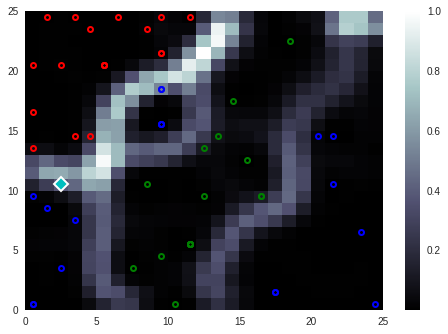

In [0]:
# Visualizing the results
from array import *
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 'o', 'o']
colors = ['r', 'g', 'b']

#futher read https://matplotlib.org/2.0.2/api/colors_api.html

teste_vermelho = [45, 156, 115]
teste_verde = [101, 67, 65]
teste_azul = [172, 184, 104]


position_color = []
j = 0
for i, x in enumerate(X):
    w = som.winner(x)
    position_color.insert(i, [w[0], w[1], colors[1+y[i]]])
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[1+y[i]],
         markeredgecolor = colors[1+y[i]],
         markerfacecolor = 'None',
         markersize = 5,
         markeredgewidth = 2) 
    j=j+1
    
m = som.winner(teste_azul)
k = 1
dif_old = abs(m[0]-position_color[1][0])+abs(m[1]-position_color[1][1])
for i, x in enumerate(position_color):
  dif = abs(m[0]-position_color[i][0])+abs(m[1]-position_color[i][1])
  if dif_old > dif:
    dif_old = dif
    k = i
  
  
plot(m[0] + 0.5, m[1] + 0.5, 'D', markeredgecolor = 'w',  markerfacecolor = 'c',  markersize = 10,  markeredgewidth = 2)
print(position_color)
print(k)
print(position_color[k][2])
if position_color[k][2].lower() == 'r':
  print('O objeto é vermelho!')
elif position_color[k][2].lower() == 'g':
  print('O objeto é verde!')
else:
  print('O objeto é azul!')
show()




In [0]:
_